In [1]:
pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 40.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 4.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
(Stepwise,
sklearn_selected,
sklearn_selection_path)
!pip install l0bnb
from l0bnb import fit_path

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 872.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for l0bnb: filename=l0bnb-1.0.0-py3-none-any.whl size=22297 sha256=4a70e902c9780ad0cb339d834793f36eddf43277b29769711fb29848594e34d3
  Stored in directory: /root/.cache/pip/wheels/db/c7/a3/a2e42159dcc85eeb004a84772e1884c45f88d43fac0075de19
Successfully built l0bnb


# 5.7 - Applied Exercises


## Question 8 - In this exercise, we will generate simulated data, and will then use this data to perform forward and backward stepwise selection.

### (a) Create a random number generator and use its normal() method to generate a predictor X of length n = 100, as well as a noise vector " of length n = 100.

In [29]:
np.random.seed(1)
X = np.random.normal(size = 100)
noise = np.random.normal(size = 100)
X.size

100

### (b) Generate a response vector Y of length n = 100 according to the model:

$ Y = β_{0} + β_{1}X^{1} + β_{2}X^{2} + β_{3}X^{3} + ϵ$

where $β_{0}, β_{1}, β_{2}, and β_{3}$ are constants of your choice.

In [30]:
b0,b1,b2,b3 = 1,2,3,4
Y = b0 + b1*X + b2*X**2 + b3*X**3 + noise
Y.size


100

### (c) Use forward stepwise selection in order to select a model containing the predictors $X, X^{2},...,X^{10}$. What is the model obtained according to $C_{p}$? Report the coefcients of the model obtained.

In [31]:
def nCp(sigma2, estimator, X, Y):
  "Negative Cp statistic"
  n, p = X.shape
  Yhat = estimator.predict(X)
  RSS = np.sum((Y - Yhat)**2)
  return -(RSS + 2 * p * sigma2) / n

In [32]:
df_X = pd.DataFrame({'X1': X, 'X2': X**2, 'X3': X**3, 'X4': X**4, 'X5': X**5, 'X6': X**6, 'X7': X**7, 'X8': X**8, 'X9': X**9, 'X10': X**10})
df_X.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1.624345,2.638498,4.285832,6.961671,11.308158,18.368354,29.836551,48.464863,78.723675,127.874436
1,-0.611756,0.374246,-0.228947,0.140060,-0.085683,0.052417,-0.032066,0.019617,-0.012001,0.007342
2,-0.528172,0.278965,-0.147342,0.077822,-0.041103,0.021710,-0.011466,0.006056,-0.003199,0.001689
3,-1.072969,1.151262,-1.235268,1.325403,-1.422116,1.525886,-1.637228,1.756694,-1.884878,2.022415
4,0.865408,0.748930,0.648130,0.560897,0.485404,0.420073,0.363534,0.314605,0.272262,0.235617


In [33]:
df_Y = pd.DataFrame({'Y': Y})
df_Y.head()


,Y
0,28.860383
1,1.207943
2,0.594678
3,-2.039644
4,6.475215


In [110]:
sigma2 = OLS(df_Y,df_X).fit().scale


In [111]:
neg_Cp = partial(nCp, sigma2)

In [112]:
design = MS(df_X).fit(df_X)

In [113]:
strategy = Stepwise.first_peak(design, direction = 'forward', max_terms = len(design.terms))

In [117]:
mse = sklearn_selected(OLS, strategy)

In [118]:
mse.fit(df_X, df_Y)

In [119]:
mse.selected_state_

('X1', 'X10', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9')

### (d) Repeat (c), using backwards stepwise selection. How does your answer compare to the results in (c)?

In [105]:
design2 = MS(df_X).fit(df_X)

In [106]:
strategy2 = Stepwise.first_peak(design2, direction = 'backward', max_terms = len(design2.terms))

In [107]:
mse2 = sklearn_selected(OLS, strategy2, scoring = neg_Cp)

In [108]:
mse.fit(df_X, df_Y)

In [109]:
mse.selected_state_

('X1', 'X10', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9')

#### Results (d) -

* It is the exact same. We remove the furthest right first which is X9 for backwards. When we went forward we selected X9 last. However just because it was the same forward and backwards here, doesn't mean it always will

### (e) Now ft a lasso model to the simulated data, again using $X, X^{2}, ...,X^{10}$ as predictors. Use cross-validation to select the optimal value of $λ$. Create plots of the cross-validation error as a function of $λ$. Report the resulting coefcient estimates, and discuss the results obtained.

In [82]:
lambdas = 10**np.linspace(8, -2, 100) / Y.std()

In [83]:
k =5
kfold = skm.KFold(n_splits = k, random_state = 0, shuffle = True)

In [84]:
lassoCV = skl.ElasticNetCV(alphas = lambdas, l1_ratio = 1, cv = kfold)

In [85]:
lassoCV.fit(df_X, df_Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.41853958269644, tolerance: 1.4352424665154178
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.965320380573303, tolerance: 1.4352424665154178
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective d

ElasticNetCV(alphas=array([8.04540646e+06, 6.37584703e+06, 5.05274974e+06, 4.00421775e+06,
       3.17327409e+06, 2.51476545e+06, 1.99290861e+06, 1.57934599e+06,
       1.25160469e+06, 9.91875313e+05, 7.86044222e+05, 6.22926604e+05,
       4.93658680e+05, 3.91216062e+05, 3.10032039e+05, 2.45695088e+05,
       1.94709156e+05, 1.54303676e+05, 1.22283024e+05, 9.69072057e+04,
       7.67973032e+04, 6.086054...
       6.67943779e-02, 5.29334022e-02, 4.19488160e-02, 3.32437193e-02,
       2.63450790e-02, 2.08780246e-02, 1.65454774e-02, 1.31120079e-02,
       1.03910420e-02, 8.23472310e-03, 6.52587723e-03, 5.17164610e-03,
       4.09844109e-03, 3.24794447e-03, 2.57394045e-03, 2.03980379e-03,
       1.61650962e-03, 1.28105623e-03, 1.01521515e-03, 8.04540646e-04]),
             cv=KFold(n_splits=5, random_state=0, shuffle=True), l1_ratio=1)

In [86]:
lassoCV.alpha_

0.1342054684255604

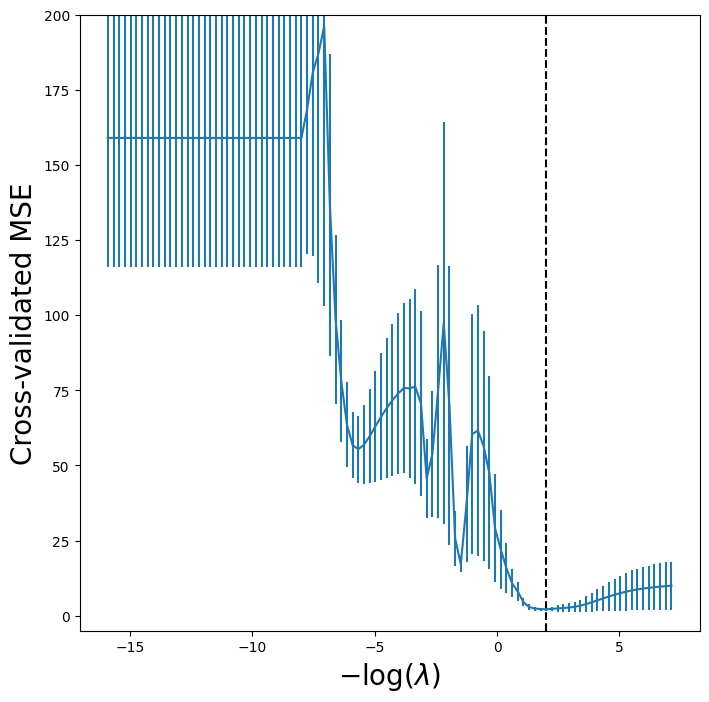

In [96]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lassoCV.alphas_), lassoCV.mse_path_.mean(1), yerr=lassoCV.mse_path_.std(1) / np.sqrt(k))
ax.axvline(-np.log(lassoCV.alpha_), c='k', ls='--')
ax.set_ylim([-5, 200])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [97]:
lassoCV.coef_

array([ 1.81664933e+00,  1.05329987e+00,  3.59819631e+00,  6.32746580e-01,
        2.42349362e-01,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -6.06113994e-03, -2.06264097e-03])

#### Results (e) -
* Our estimate for the best $λ$ is around 1 which we can see is true on this graph.

* The graph also shows that our MSE normalizes around that min value mark and costs at 10.

* At our min our MSE is around 5

* We can also see we made 3 zero coeficients from [97]. This shows it would be more rigid then linear regression so less variance but higher bias

* The last two coeficients are practically nonzero so overall this is a great model. The first 3 are the strongest which we know is the true result



### (f) Now generate a response vector Y according to the model

$Y = β_{0} + β_{7}X^{7} + ϵ$

and perform forward stepwise selection and the lasso. Discuss the results obtained.

In [98]:
b0,b7 = 1,7
Y2 = b0 + b7*X**7 + noise

In [100]:
df_Y2 = pd.DataFrame({'Y2': Y2})
df_Y2.head()

,Y2
0,209.408725
1,2.000043
2,1.323227
3,-9.867017
4,2.449826


In [120]:
def stepwise(dir):
  design2 = MS(df_X).fit(df_X)
  strategy2 = Stepwise.first_peak(design2, direction = dir, max_terms = len(design2.terms))
  mse2 = sklearn_selected(OLS, strategy2)
  mse2.fit(df_X, df_Y2)
  print(mse2.selected_state_)

stepwise('forward')


('X1', 'X10', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9')
()


In [126]:
def lassoCV2(lambdas, kfold):
  lassoCV2 = skl.ElasticNetCV(alphas = lambdas, l1_ratio =1, cv = kfold)
  lassoCV2.fit(df_X, df_Y2)
  print(lassoCV2.alpha_)
  print(lassoCV2.coef_)
  return lassoCV2
lambdas = 10**np.linspace(2, -50, 50) / Y2.std()
kfold = skm.KFold(n_splits = 10, random_state = 0, shuffle = True)
lCv2 = lassoCV2(lambdas, kfold)


2.815937282479774e-53
[ 5.05943819e+00  1.76976288e+00 -1.71778647e+01 -1.70139207e+00
  1.47199586e+01  1.07431722e-01  2.68102664e+00  4.55495599e-02
  4.06540862e-01 -3.73406664e-04]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [135]:
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,RidgeCV
trainedLasso = LassoCV(alphas = lambdas, cv = kfold)
trainedLasso.fit(df_X, df_Y2)
trainedLasso.alpha_
trainedLasso.coef_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 5.05943819e+00,  1.76976288e+00, -1.71778647e+01, -1.70139207e+00,
        1.47199586e+01,  1.07431722e-01,  2.68102664e+00,  4.55495599e-02,
        4.06540862e-01, -3.73406664e-04])

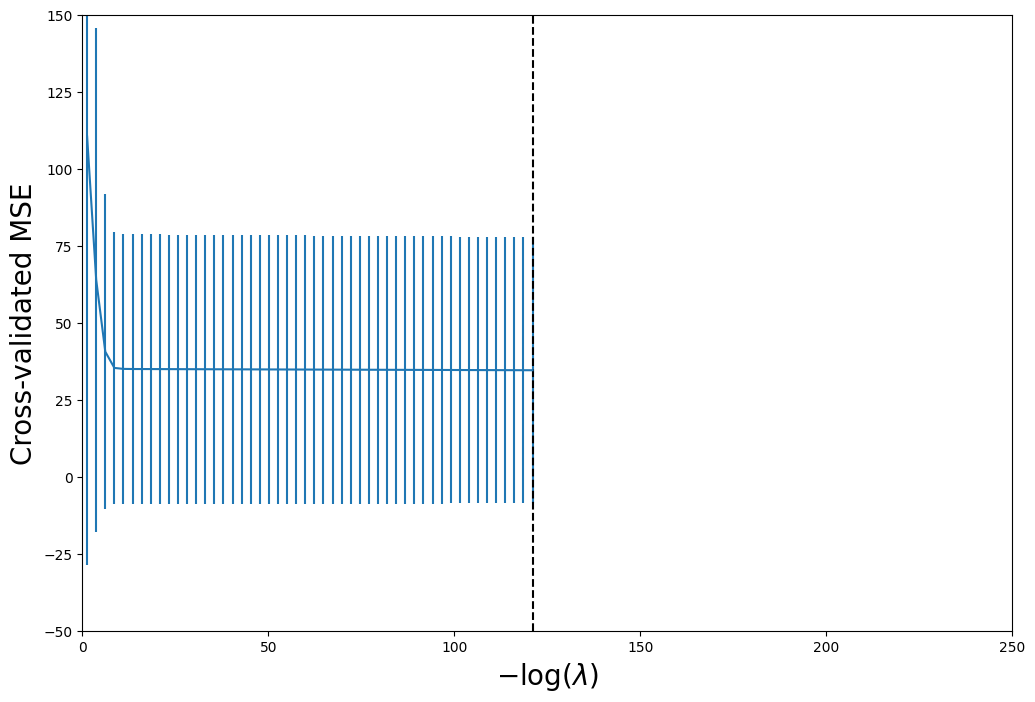

In [132]:
lassoCV_fig, ax = subplots(figsize=(12,8))
ax.errorbar(-np.log(lCv2.alphas_), lCv2.mse_path_.mean(1), yerr=lCv2.mse_path_.std(1) / np.sqrt(k))
ax.axvline(-np.log(lCv2.alpha_), c='k', ls='--')
ax.set_ylim([-50, 150])
ax.set_xlim([0, 250])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

#### Results (f) -

* The forward selection did not generate a great sample. We expected to see X7 at the front or least the first few elements.

* The lasso generated a much better sample even tho the values didn't go exactly to 0. $X_{7}$ is the second highest coefficient.

## Question 9 - In this exercise, we will predict the number of applications received using the other variables in the College data set.

### (a) Split the data set into a training set and a test set.

In [137]:
college  = load_data('College')

In [138]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [141]:
hotencode = {'Yes' : 1, 'No': 0}
college['Private'] = college['Private'].map(hotencode)

In [199]:
results = []

In [142]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [143]:
X_train, X_test, y_train, y_test = skm.train_test_split(college.drop('Apps', axis = 1), college['Apps'], test_size = 0.3, random_state = 0)

### (b) - Fit a linear model using least squares on the training set, and report the test error obtained.

In [200]:
from sklearn.metrics import r2_score
lr = LinearRegression()
pred = lr.fit(X_train, y_train).predict(X_test)
score = r2_score(y_test, pred)
score
results += [score]


### (c) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [150]:
alphas = 10**np.linspace(10, -2, 100)
ridge_cv = RidgeCV(alphas = alphas, cv = kfold)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84803587e+0...
       2.00923300e+00, 1.51991108e+00, 1.14975700e+00, 8.69749003e-01,
       6.57933225e-01, 4.97702356e-01, 3.76493581e-01, 2.84803587e-01,
       2.15443469e-01, 1.62975083e-01, 1.23284674e-01, 9.32603347e-02,
       7.05480231e-02, 5.33669923e-02, 4.03701726e-02, 3.05385551e-02,
       2.31012970e-02, 1.74752840e-02, 1.32194115e-02, 1.00000000e-02]),
        cv=KFold(n_splits=10, random_state=0, shuffle=True))

In [151]:
ridge_cv.alpha_

0.01

In [201]:
pred = ridge_cv.predict(X_test)
score2 = r2_score(y_test, pred)
results += [score2]

In [157]:
print(pd.Series(np.hstack([ridge_cv.intercept_,ridge_cv.coef_]),index = ['Intercept'] + list(college.drop('Apps',axis = 1).columns)))

Intercept     -323.580663
Private       -671.330025
Accept           1.260853
Enroll          -0.378688
Top10perc       52.619152
Top25perc      -16.154593
F.Undergrad      0.098952
P.Undergrad      0.037655
Outstate        -0.042852
Room.Board       0.217586
Books            0.035520
Personal        -0.045310
PhD             -9.465520
Terminal        -4.686864
S.F.Ratio        4.575274
perc.alumni     -7.541394
Expend           0.064438
Grad.Rate       10.583508
dtype: float64


#### Results -(c)

* Quite a few coefficicents are shrunk close to 0, but none are 0. Our $λ$ value is relatively small too.

### (d) Fit a lasso model on the training set, with λ chosen by crossvalidation. Report the test error obtained, along with the number of non-zero coefcient estimates.

In [202]:
alphas = 10**np.linspace(4, -1, 100)
lasso = LassoCV(alphas = alphas, cv = kfold)
lasso.fit(X_train, y_train)
predict = lasso.predict(X_test)
print(lasso.alpha_)
print(lasso.coef_)
score3 = r2_score(y_test, predict)
results += [score3]

0.1
[-6.70176896e+02  1.26090181e+00 -3.78762140e-01  5.26166904e+01
 -1.61533665e+01  9.89790786e-02  3.76738838e-02 -4.29153047e-02
  2.17539680e-01  3.54739907e-02 -4.53107823e-02 -9.46076625e+00
 -4.68123734e+00  4.58185410e+00 -7.54237508e+00  6.44447510e-02
  1.05808207e+01]


In [164]:
print(pd.Series(np.hstack([lasso.intercept_,lasso.coef_]),index = ['Intercept'] + list(college.drop('Apps',axis = 1).columns)))

Intercept     -324.438362
Private       -670.176896
Accept           1.260902
Enroll          -0.378762
Top10perc       52.616690
Top25perc      -16.153367
F.Undergrad      0.098979
P.Undergrad      0.037674
Outstate        -0.042915
Room.Board       0.217540
Books            0.035474
Personal        -0.045311
PhD             -9.460766
Terminal        -4.681237
S.F.Ratio        4.581854
perc.alumni     -7.542375
Expend           0.064445
Grad.Rate       10.580821
dtype: float64


#### Results (d) -

* None of my variable shrunk to 0
* Test error was relative to the two other methods. It was .9086

### (e) Fit a PCR model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.

In [203]:
def PCA_LR(n_):
  #scale X
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X_train)

  #perform PCA on scaled X
  pca = PCA(n_components = n_)
  X_pc = pca.fit_transform(X_scaled)

  #Fit regression to perform PCA next step
  lr = LinearRegression()
  lr.fit(X_pc, y_train)

  #Scale the test data
  X_test_scaled = scaler.transform(X_test)

  #Scale the test data to PCA
  X_test_pc = pca.transform(X_test_scaled)

  #Make prediction
  pred = lr.predict(X_test_pc)

  #Access Results
  score4 = r2_score(y_test, pred)
  print(score4)
  return score4
for i in range(5, 18):
  PCA_LR(i)

results += [PCA_LR(17)]

0.7659197070067031
0.7697664671885559
0.7703156794063306
0.772379142492269
0.7818245369571898
0.7831123285219026
0.7802755360011363
0.78054924933321
0.7798973734121198
0.7802431227438358
0.7844974271024742
0.8956924706556205
0.9086043157818379
0.9086043157818379


#### Results (e) -

* We see using brute force that the perfect m value is 16. We can throw that into the formula and get a test error of .896. This is close to everything else we have gotten so far.

###(f) Fit a PLS model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.

In [182]:
print(len(X_test.columns))

17


In [189]:
nums = np.arange(1,18)
nums

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

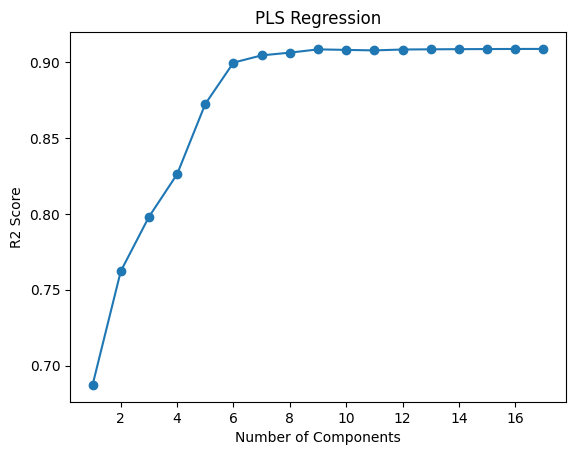

In [195]:
cv_scores = []
for i in nums:
  pls = PLSRegression(n_components = i, scale = True)
  pls.fit(X_train, y_train)
  pred = pls.predict(X_test)
  cv_scores.append(r2_score(y_test, pred))

plt.plot(nums, cv_scores, marker = 'o')
plt.xlabel('Number of Components')
plt.ylabel('R2 Score')
plt.title('PLS Regression')
plt.show()



In [208]:
def PLS_LR(n_):
  pls = PLSRegression(n_components = n_, scale = True)
  pls.fit(X_train, y_train)
  pred = pls.predict(X_test)
  print(r2_score(y_test, pred))
  return r2_score(y_test, pred)

PLS_LR(5)
PLS_LR(8)
PLS_LR(10)
PLS_LR(16)

results += [PLS_LR(16)]

0.872357082260028
0.9061543809710665
0.9079656459092282
0.9085815415554497
0.9085815415554497


#### Results (f) -

* WE picked m by cross validation on the graph to be about 16 for the highest point. However the lower points limit variance and are within the standard error.

* Our total error was .9086. The same for PCR.

### (g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much diference among the test errors resulting from these five approaches?

In [210]:
results = results[:4] + results[6:]

In [212]:
results

[0.9086043157818366,
 0.9086055846364456,
 0.9086147742386906,
 0.9086043157818379,
 0.9085815415554497]

#### Results (g) -

* We can see all the test errors are extremely close. However the best test error came from 3 which was the Lasso. The second was Ridge Regression then PCR, linear regression, and lastly partial least squares.

* I am surprised least squares did as well since this was a high dimensionality problem. We were given an n = 4 and a p = 17. Thus p >> n so I thought linear regression shouldn't be used and would have a more inaccurate result.

## Question 10 - We have seen that as the number of features used in a model increases, the training error will necessarily decrease, but the test error may not. We will now explore this in a simulated data set.